In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from  scipy.stats import zscore
from sklearn import svm

# SVM (klasyfikacja)

In [61]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
clf = svm.SVC(kernel='linear', C=50)
clf.fit(X_train_scaled, y_train)

SVC(C=50, kernel='linear')

In [65]:
y_test_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [66]:
print(confusion_matrix(y_test, y_test_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


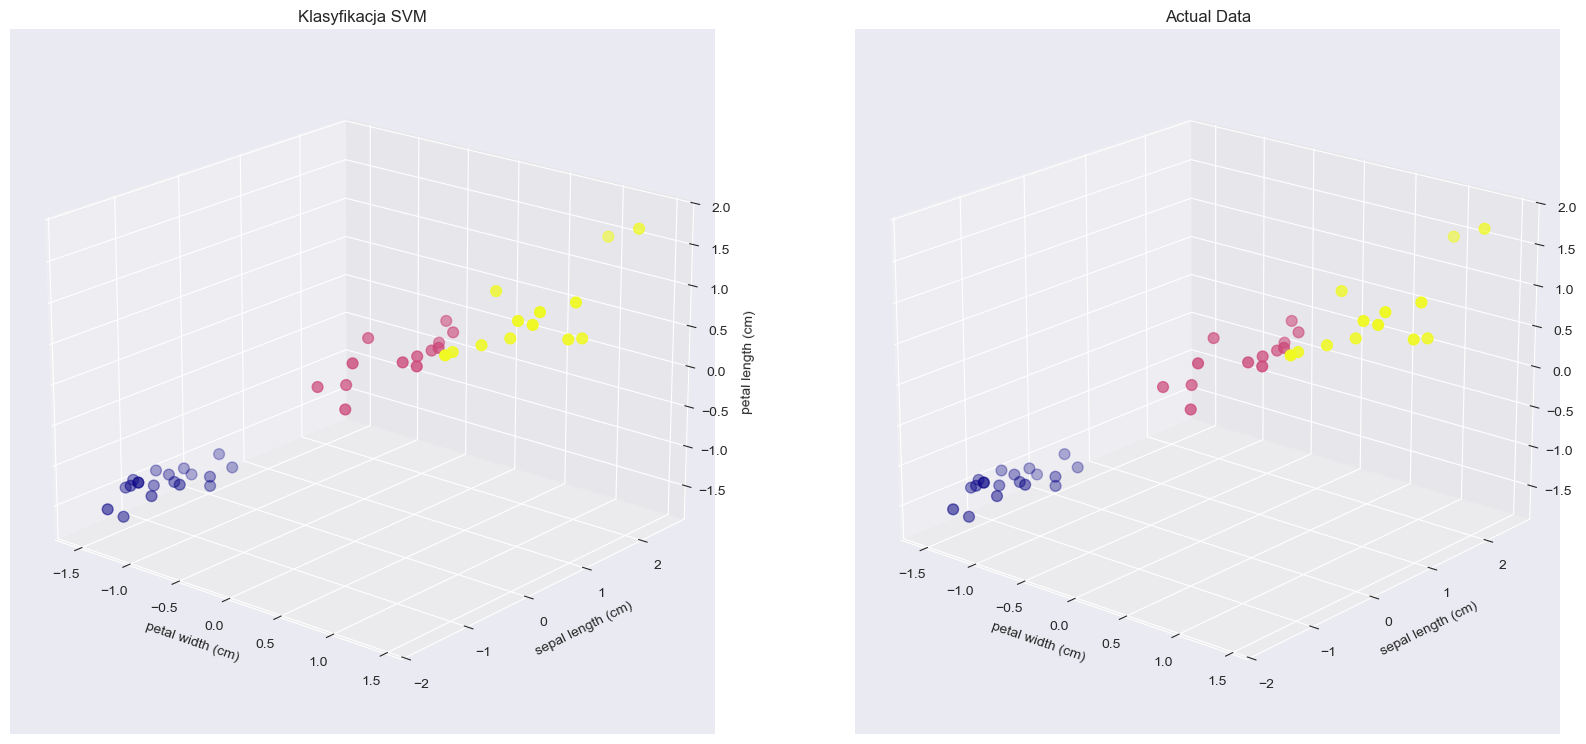

In [67]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X_test_scaled[:, 3], X_test_scaled[:, 0], X_test_scaled[:, 2], c=y_test_pred, cmap='plasma', s=60)
ax1.view_init(20, -50)
ax1.set_xlabel(iris.feature_names[3])
ax1.set_ylabel(iris.feature_names[0])
ax1.set_zlabel(iris.feature_names[2])
ax1.set_title('Klasyfikacja SVM')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_test_scaled[:, 3], X_test_scaled[:, 0], X_test_scaled[:, 2], c=y_test, cmap = 'plasma', s=60)
ax2.view_init(20, -50)
ax2.set_xlabel(iris.feature_names[3])
ax2.set_ylabel(iris.feature_names[0])
ax2.set_zlabel(iris.feature_names[2])
ax2.set_title('Actual Data')

plt.show()

# SVR (regresja)

In [68]:
df = pd.read_csv('data/housing.csv')
df

,Cena,Powierzchnia,Miasto,Liczba pokoi,Rok budowy
0,310000,40.80,Mikolow,1,1959
1,489000,40.84,Mikolow,1,2022
2,540000,60.00,Mikolow,3,1910
3,950000,125.40,Mikolow,4,2025
4,1250000,124.30,Mikolow,4,2025
...,...,...,...,...,...
75,430000,51.00,Tychy,3,1957
76,598000,40.00,Tychy,2,2024
77,279000,38.00,Tychy,2,1970
78,370000,51.00,Tychy,2,1980


In [69]:
z_score = zscore(df['Cena'])
prog = 3
df_filtered = df[np.abs(z_score) < prog]
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,Cena,Powierzchnia,Miasto,Liczba pokoi,Rok budowy
0,310000,40.80,Mikolow,1,1959
1,489000,40.84,Mikolow,1,2022
2,540000,60.00,Mikolow,3,1910
3,950000,125.40,Mikolow,4,2025
4,1250000,124.30,Mikolow,4,2025
...,...,...,...,...,...
74,430000,51.00,Tychy,3,1957
75,598000,40.00,Tychy,2,2024
76,279000,38.00,Tychy,2,1970
77,370000,51.00,Tychy,2,1980


In [70]:
X_num = df_filtered.select_dtypes(include=[np.number]).drop(columns=['Cena'])
X_city = pd.get_dummies(df_filtered['Miasto'], prefix = 'Miasto', drop_first = True)
X = pd.concat([X_num, X_city], axis=1)
y = df_filtered['Cena']
df_filtered = pd.concat([X, y], axis=1)

In [71]:
corr_matrix = df_filtered.corr()

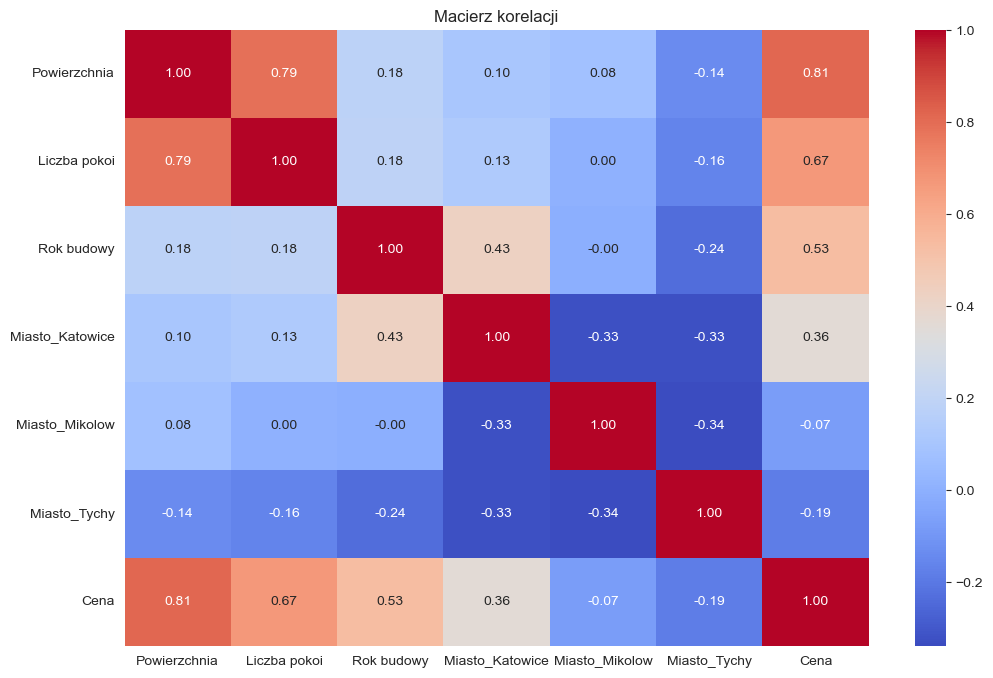

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

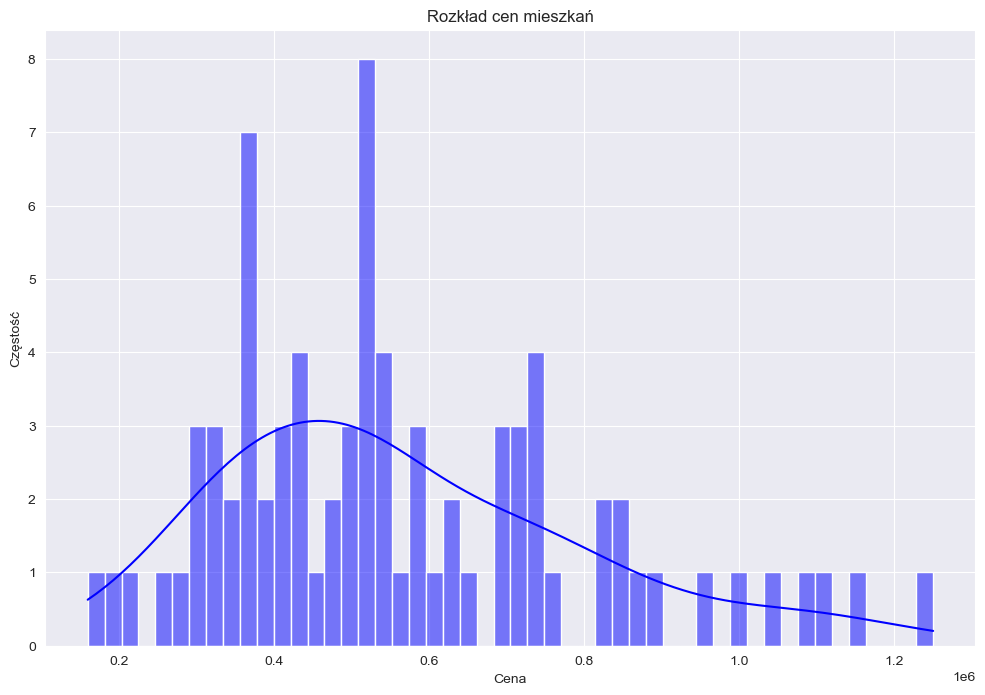

In [73]:
plt.figure(figsize=(12, 8))
sns.histplot(y, bins = 50, kde=True, color='blue')
plt.title('Rozkład cen mieszkań')
plt.xlabel('Cena')
plt.ylabel('Częstość')
plt.show()

In [74]:
skosnosc = pd.Series(y).skew()
print(skosnosc)

0.8345973552622135


In [75]:
y_log = np.log(y)

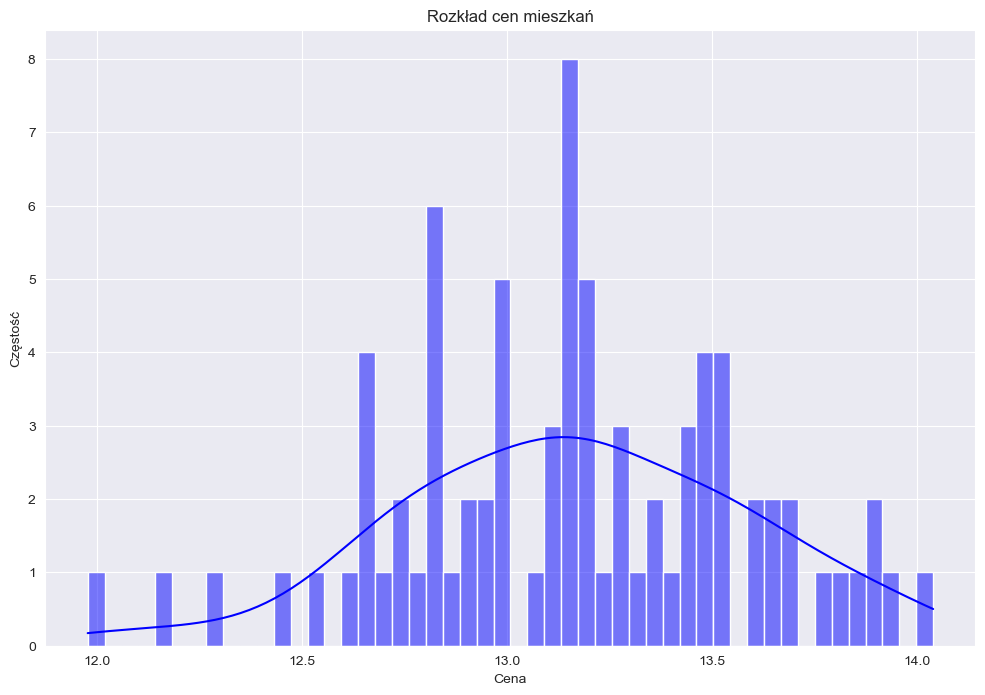

In [76]:
plt.figure(figsize=(12, 8))
sns.histplot(y_log, bins = 50, kde=True, color='blue')
plt.title('Rozkład cen mieszkań')
plt.xlabel('Cena')
plt.ylabel('Częstość')
plt.show()

In [77]:
skosnosc_log = pd.Series(y_log).skew()
print(skosnosc_log)

-0.20627309446622308


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
reg = svm.SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 1)

In [81]:
reg.fit(X_train_scaled, y_train)

SVR(C=10, gamma=1)

In [82]:
y_test_pred = reg.predict(X_test_scaled)

In [83]:
r2 = r2_score(np.exp(y_test), np.exp(y_test_pred))
mae = mean_absolute_error(np.exp(y_test), np.exp(y_test_pred))
rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2: 0.48301175583513656
MAE: 114738.95804607618
RMSE: 180711.94124101463
